<a href="https://colab.research.google.com/github/mdogruer905/Reuters-Binary-Classification-With-Keras/blob/main/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuters Data
Reuters'in 1986 yılından beri yayınlandığı kısa haberler ve ait oldukları konuları barındıran veri setidir. Metin sınıflandırma da sıkça kullanılan bir veri setidir. Veri setinde 46 farklı konu bulunur

In [1]:
from google.colab import drive
drive.mount('/gdrive')
% cd/gdrive

Mounted at /gdrive
/gdrive


In [2]:
#Device info
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10829150055160915264, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15866611667657733579
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print("Eğitim :",len(train_data))

Eğitim : 8982


In [5]:
print("Test :",len(test_data))

Test : 2246


# Data Preparation (Verileri Hazırlama İşlemi)

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    ##(len(sequences), dimension) şeklinde tüm elemanları sıfır olan matris oluşturur
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1. #results[i]'nin istenen indekselerini 1 yapar
    return results

x_train = vectorize_sequences(train_data) # Eğitim vektör verisi
x_test = vectorize_sequences(test_data) # Test vektör verisi


# One Hot Encoding 

In [7]:
from keras.utils.np_utils import  to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Building to Network

#### Reuters Veri Setinde: 46 Farklı konu var. Bu konuların karışmaması ve darboğaz olarak bir sonra ki işlemin de öğrenmesini artırmak için 46'dan fazla hidden layers seçmemiz gerekir

In [8]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax')) # Son katman 

# Categorical Crossentropy: 
> **İki olasılık dağılımı arasında ki mesafeyi ölçer**

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Yaklaşım Doğrulama İşlemi


In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]


y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
#Model Compile

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 33ms/step - loss: 2.5581 - accuracy: 0.5360 - val_loss: 1.6725 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3932 - accuracy: 0.7072 - val_loss: 1.2844 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0393 - accuracy: 0.7724 - val_loss: 1.1228 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8224 - accuracy: 0.8246 - val_loss: 1.0334 - val_accuracy: 0.7880
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6558 - accuracy: 0.8621 - val_loss: 0.9493 - val_accuracy: 0.8160
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5255 - accuracy: 0.8906 - val_loss: 0.9225 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4218 - accuracy: 0.9131 - val_loss: 0.9018 - val_accuracy: 0.8150
Epoch 8/20
16

# Eğitim ve Doğrulama Kaybı

In [12]:
#Keyword list
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

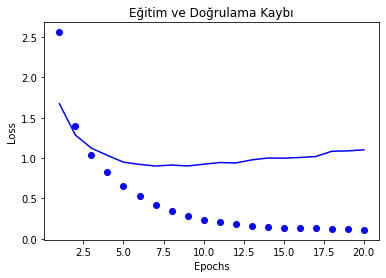

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Eğitim Kaybı')
plt.plot(epochs,val_loss, 'b',label = 'Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Eğitim ve Doğrulama Başarımı

1.  accuracy =     Doğruluk
2.  val_accuracy = Başrımı


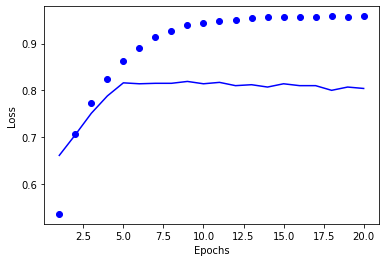

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc,'bo',label='Eğitim Başarımı')
plt.plot(epochs,val_acc,'b',label = 'Doğrulama Başarımı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Modeli En Baştan Eğitmek

In [15]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss ='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val)),

results = model.evaluate(x_test,one_hot_test_labels)
print("Kayıp Fonksiyonu:",results[0],"Doğruluk",results[1])

Epoch 1/9
16/16 [==============================] - 1s 30ms/step - loss: 2.5484 - accuracy: 0.4781 - val_loss: 1.7218 - val_accuracy: 0.5980
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.4049 - accuracy: 0.7065 - val_loss: 1.2906 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 16ms/step - loss: 1.0528 - accuracy: 0.7833 - val_loss: 1.1451 - val_accuracy: 0.7500
Epoch 4/9
16/16 [==============================] - 0s 17ms/step - loss: 0.8372 - accuracy: 0.8236 - val_loss: 1.0368 - val_accuracy: 0.7940
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6714 - accuracy: 0.8569 - val_loss: 0.9805 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5351 - accuracy: 0.8866 - val_loss: 0.9194 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4270 - accuracy: 0.9099 - val_loss: 0.9288 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===